In [1]:
import json
import pandas as pd
import os
import random
import numpy as np
from PIL import Image, ImageEnhance,ImageChops
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import os
import cv2

##### Read json file

In [2]:
with open('cat_dog_annotations.json') as annotaed_data:
          file_contents = annotaed_data.read()
  
json_data = json.loads(file_contents)
print(json_data) 

{'_via_settings': {'ui': {'annotation_editor_height': 25, 'annotation_editor_fontsize': 0.8, 'leftsidebar_width': 18, 'image_grid': {'img_height': 80, 'rshape_fill': 'none', 'rshape_fill_opacity': 0.3, 'rshape_stroke': 'yellow', 'rshape_stroke_width': 2, 'show_region_shape': True, 'show_image_policy': 'all'}, 'image': {'region_label': 'class', 'region_color': '__via_default_region_color__', 'region_label_font': '10px Sans', 'on_image_annotation_editor_placement': 'NEAR_REGION'}}, 'core': {'buffer_size': 18, 'filepath': {}, 'default_filepath': ''}, 'project': {'name': 'via_project_18Oct2022_11h49m'}}, '_via_img_metadata': {'1.jpeg45602': {'filename': '1.jpeg', 'size': 45602, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 284, 'y': 27, 'width': 365, 'height': 478}, 'region_attributes': {'class': {'dog': True}}}], 'file_attributes': {}}, '2.jpeg4669': {'filename': '2.jpeg', 'size': 4669, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 6, 'y': 39, 'width': 150, 'height': 107

In [3]:
json_data.keys()

dict_keys(['_via_settings', '_via_img_metadata', '_via_attributes'])

In [4]:
json_data['_via_img_metadata'].keys()

dict_keys(['1.jpeg45602', '2.jpeg4669', '3.jpeg6828', '4.jpeg198685', '5.jpeg54509', '6.jpeg60092', '7.jpeg394361'])

In [5]:
img_metadata = json_data['_via_img_metadata'].values()
img_metadata

dict_values([{'filename': '1.jpeg', 'size': 45602, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 284, 'y': 27, 'width': 365, 'height': 478}, 'region_attributes': {'class': {'dog': True}}}], 'file_attributes': {}}, {'filename': '2.jpeg', 'size': 4669, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 6, 'y': 39, 'width': 150, 'height': 107}, 'region_attributes': {'class': {'dog': True}}}, {'shape_attributes': {'name': 'rect', 'x': 160, 'y': 77, 'width': 99, 'height': 65}, 'region_attributes': {'class': {'cat': True}}}], 'file_attributes': {}}, {'filename': '3.jpeg', 'size': 6828, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 57, 'y': 3, 'width': 186, 'height': 141}, 'region_attributes': {'class': {'cat': True}}}], 'file_attributes': {}}, {'filename': '4.jpeg', 'size': 198685, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 85, 'y': 307, 'width': 830, 'height': 1442}, 'region_attributes': {'class': {'cat': True}}}], 'file_attributes': {}}, {'filename': '5.jp

#### 1. Fetch an image and data from VGG formatted JSON annotations

#### 2. Load that image

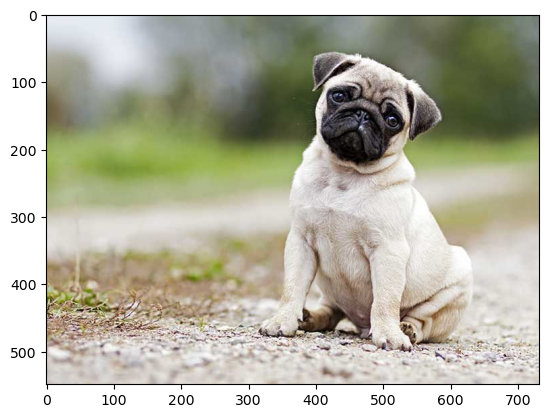

In [6]:
key, value = next(iter(json_data['_via_img_metadata'].items()))
an_img = Image.open(value['filename'])

plt.plot(3,4,1)
plt.imshow(an_img)
plt.show()


In [7]:
# (h, w) = bright_img.shape[:2]

# angle =-90

# # image_center = tuple(np.array(bright_img.shape[1::-1]) / 2)
# (cX, cY) = (w // 2, h // 2)
# M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)

# cos = np.abs(M[0, 0])
# sin = np.abs(M[0, 1])

# # compute the new bounding dimensions of the image
# nW = int((h * sin) + (w * cos))
# nH = int((h * cos) + (w * sin))

# M[0, 2] += (nW / 2) - cX
# M[1, 2] += (nH / 2) - cY


# # calculated = np.dot(M,corners.T).T
    
# # calculated = calculated.reshape(-1,8)

# result_img = cv2.warpAffine(bright_img, M, (nW, nH))
# plt.imshow(result_img)

#### 3. Resize that image from resize scale percentage 60 to 100 randomly. Thats mean the resulting images will be between 60% to 100% of original size. Do forget to adjust the bounding boxes according to new resized image.

#### 4. Add random brightness to that resized image.

#### 5. Rotate that brighter image on an angle n. Don't forget to adjust bounding boxes according to the angle.

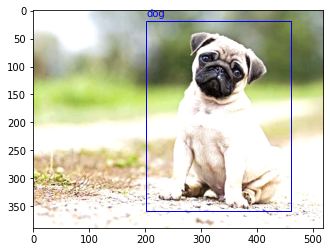

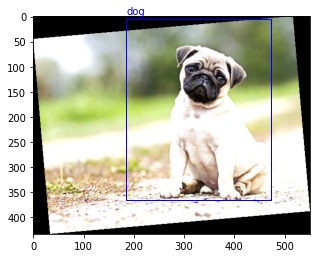

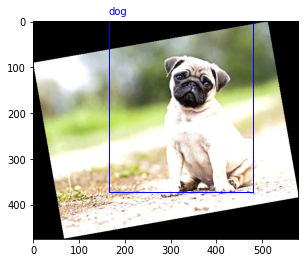

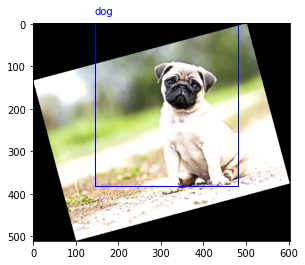

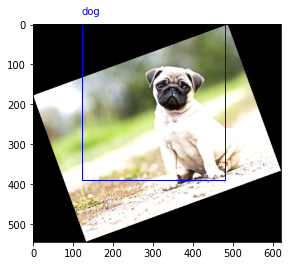

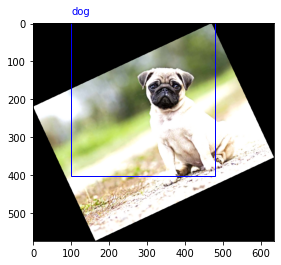

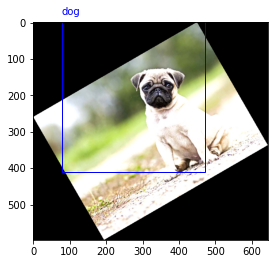

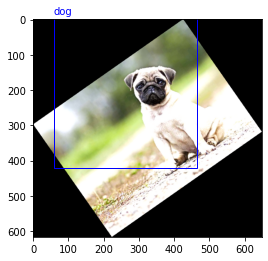

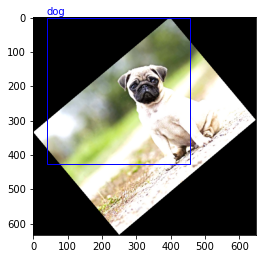

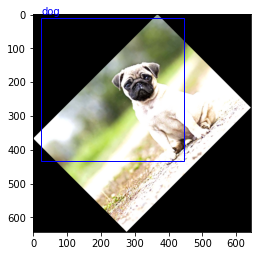

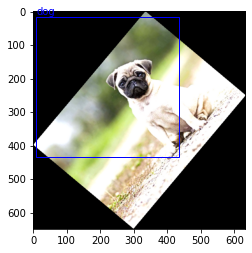

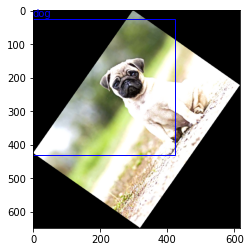

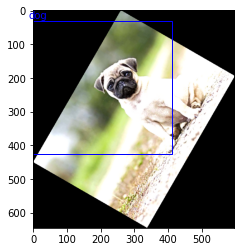

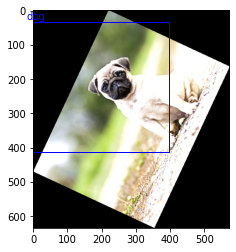

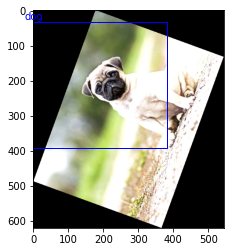

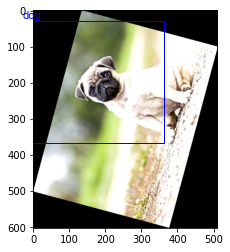

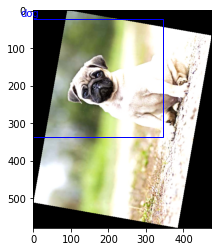

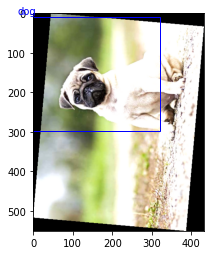

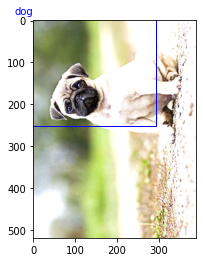

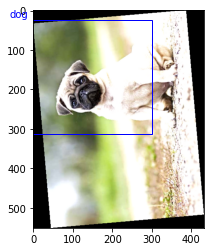

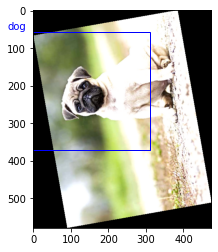

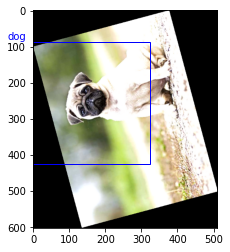

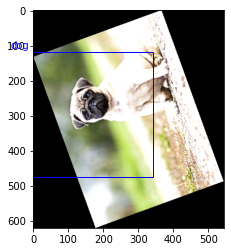

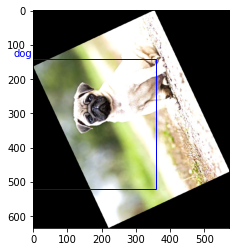

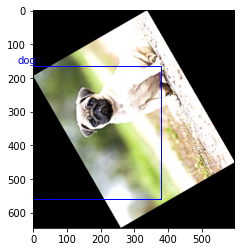

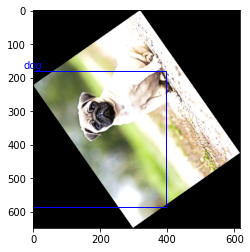

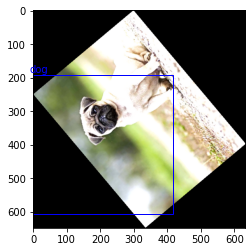

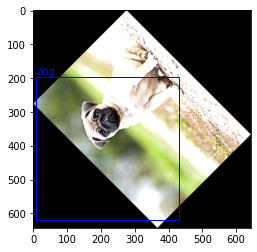

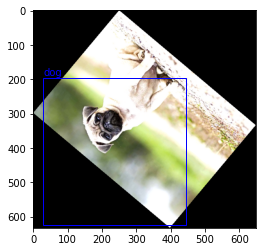

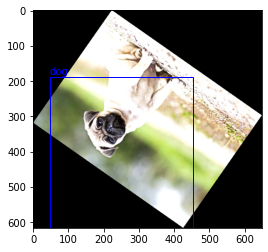

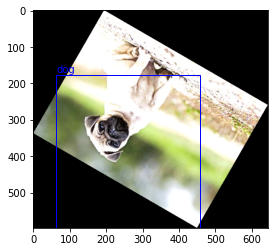

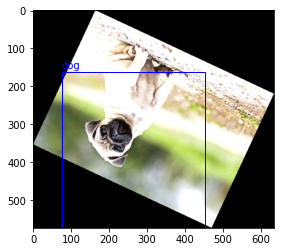

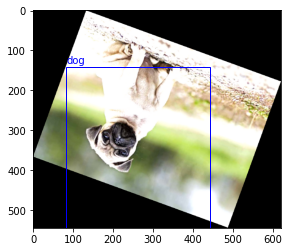

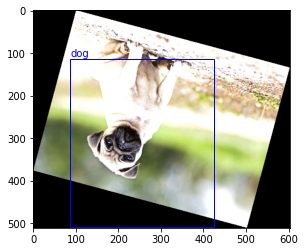

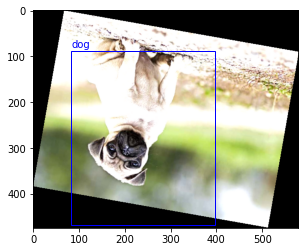

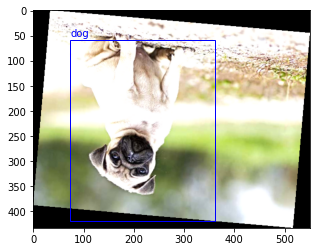

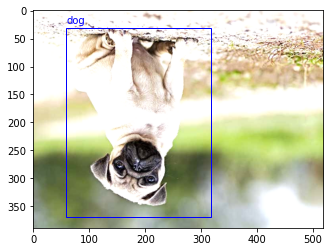

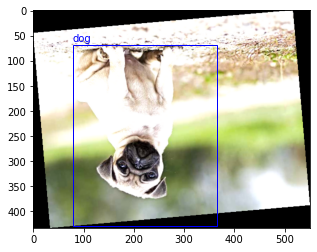

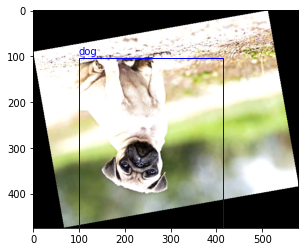

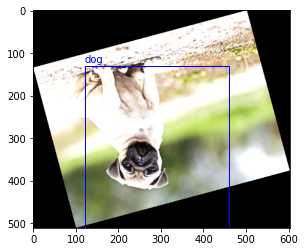

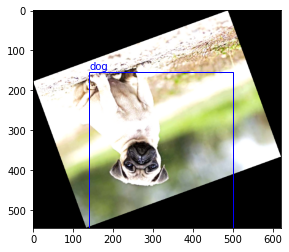

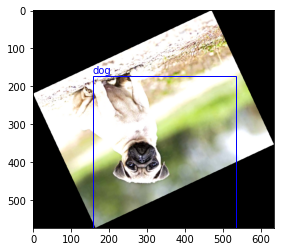

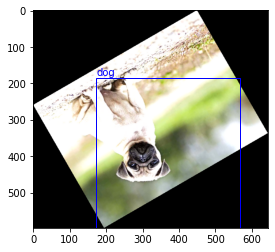

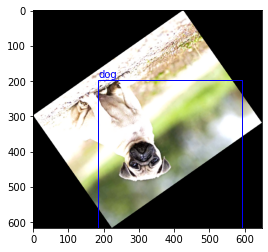

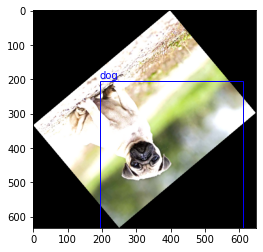

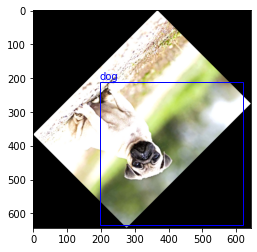

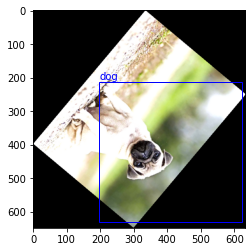

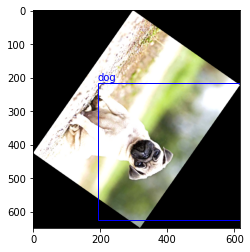

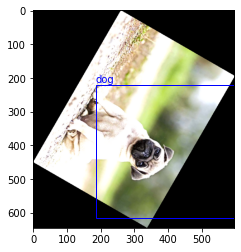

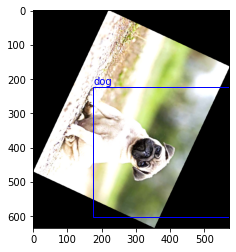

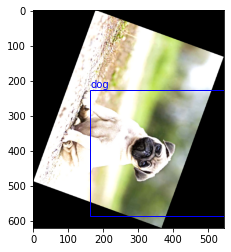

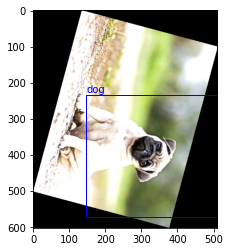

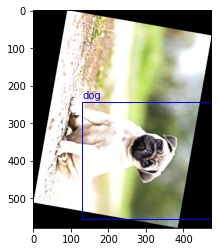

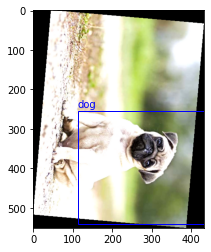

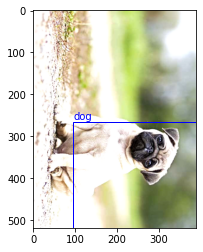

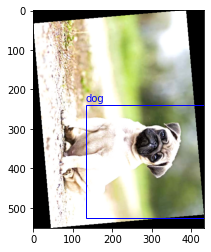

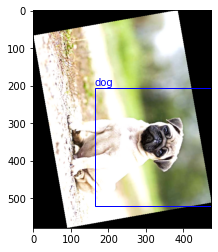

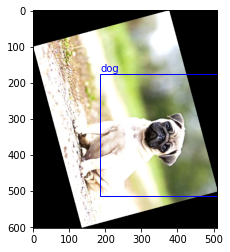

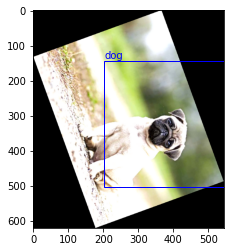

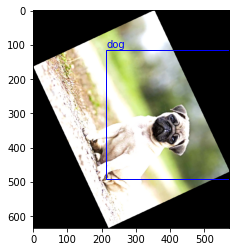

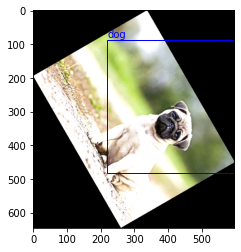

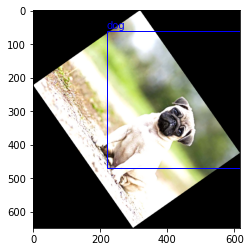

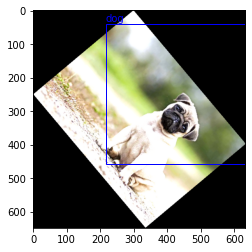

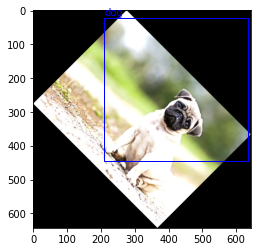

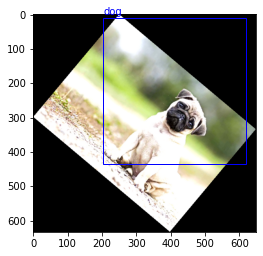

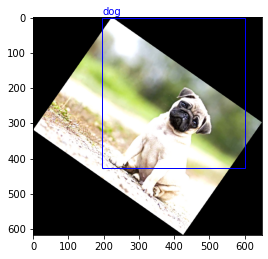

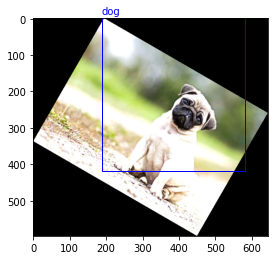

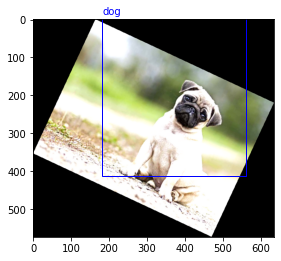

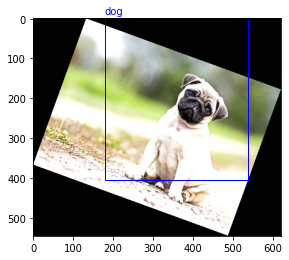

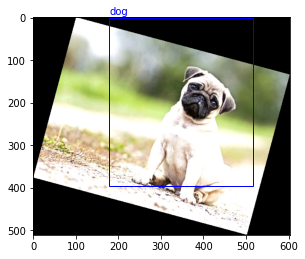

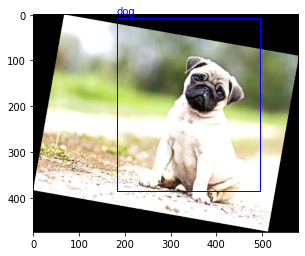

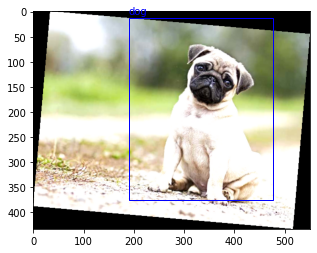

In [50]:
angles = range(0, 360, 5)
resize_percent = random.randint(60, 100)
    
img_resized = an_img.resize((int(an_img.width * resize_percent / 100), int(an_img.height * resize_percent / 100)))
enhancer = ImageEnhance.Brightness(img_resized)

factor = random.uniform(0.9, 1.5) 
img_resized = enhancer.enhance(factor)

for angle in angles:
        img_rotated = img_resized.rotate(angle, resample=Image.BILINEAR, expand=True)
        matrix = np.array([
            [np.cos(np.radians(angle)), -np.sin(np.radians(angle))],
            [np.sin(np.radians(angle)), np.cos(np.radians(angle))]
        ])
        
        center = np.array([img_rotated.width / 2, img_rotated.height / 2])
        
        image_data = json_data['_via_img_metadata']['1.jpeg45602']
        for region in image_data['regions']:
            x = region['shape_attributes']['x'] * resize_percent / 100
            y = region['shape_attributes']['y'] * resize_percent / 100
            w = region['shape_attributes']['width'] * resize_percent / 100
            h = region['shape_attributes']['height'] * resize_percent / 100
            
            rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='b', facecolor='none')
            points = np.array([[x, y], [x + w, y], [x + w, y + h], [x, y + h]])
            points = np.dot(points - center, matrix) + center
            
            # Calculate the new bounding box dimensions
            x, y = np.min(points, axis=0)
            w, h = np.max(points, axis=0) - np.min(points, axis=0)
            
            fig, data_img = plt.subplots(1)
            data_img.imshow(img_rotated)
            rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='b', facecolor='none')
            data_img.add_patch(rect)

            label = list(region['region_attributes']['class'].keys())[0]
            plt.text(x, y-8, label, color='b')
            
        plt.show()



#### Repeat step 3 to 6 for angles 0, 5, 10, 15, 20, ....., 350 and 355

#### 8. Repeat step 1 to 7 for all remaining images too

In [ ]:

#range to rotate

for metadata in img_metadata:
    filename = metadata['filename']
    img = Image.open(filename)
    # Randomly adjust size between 60 to 100,so that resizing shoul be in between given ratio
    resize_percent = random.randint(60, 100)
    
    img_resized = img.resize((int(img.width * resize_percent / 100), int(img.height * resize_percent / 100)))
    brightness_enhancer = ImageEnhance.Brightness(img_resized)
    
    factor = random.uniform(0.9, 1.5) # adjust brightness factor between 0.9 and 1.5
    img_resized = brightness_enhancer.enhance(factor)
    
    angles = range(0, 360, 5)  
    
    for angle in angles:
        img_rotated = img_resized.rotate(angle, resample=Image.BILINEAR, expand=True)
        # transformation matrix so image rotate accordingly
        matrix = np.array([
            [np.cos(np.radians(angle)), -np.sin(np.radians(angle))],
            [np.sin(np.radians(angle)), np.cos(np.radians(angle))]
        ])
        # now we are going to Get the image center so that along image rotation bbox rotate accordingly as same axis
        center = np.array([img_rotated.width / 2, img_rotated.height / 2])
        
        # now transform the bounding box coordinates according to size of image
        for region in metadata['regions']:
            x = region['shape_attributes']['x'] * resize_percent / 100
            y = region['shape_attributes']['y'] * resize_percent / 100
            w = region['shape_attributes']['width'] * resize_percent / 100
            h = region['shape_attributes']['height'] * resize_percent / 100

            # Rotate the bounding box coordinates around the center as image
            points = np.array([[x, y], [x + w, y], [x + w, y + h], [x, y + h]])
            points = np.dot(points - center, matrix) + center

            # fixed the coordinates using np
            x, y = np.min(points, axis=0)
            w, h = np.max(points, axis=0) - np.min(points, axis=0)

            fig, data_img = plt.subplots(1)
            data_img.imshow(img_rotated)
            rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='b', facecolor='none')

            bbox_img =  data_img.add_patch(rect)
            
#             create folder to store augmented images in disk
            if not os.path.exists('imges_with_bbox'):
                os.mkdir('imges_with_bbox')

            #extract the labels
            label = list(region['region_attributes']['class'].keys())[0]
            plt.text(x, y-8, label, color='b')
            
#             set the file name and format of image we are going to store in disk
            image_name = os.path.splitext(os.path.basename(filename))[0]
            output_filename = f"{image_name}_angle{angle}_bbox.png"

            # Save the image with the bounding box to disk
            plt.savefig(os.path.join('imges_with_bbox', output_filename), bbox_inches='tight')
            

#         plt.show()


#### convert all modified images and bboxes into coco json file

In [ ]:
angles = range(0, 360, 5)

# Loop through each image in the metadata
for i, metadata in enumerate(img_metadata):
    filename = metadata['filename']
    img = Image.open(filename)
    # Randomly adjust size between 60 to 100
    resize_percent = random.randint(60, 100)
    
    img_resized = img.resize((int(img.width * resize_percent / 100), int(img.height * resize_percent / 100)))
    enhancer = ImageEnhance.Brightness(img_resized)
    factor = random.uniform(0.9, 1.5) # adjust brightness factor between 0.9 and 1.5
    img_resized = enhancer.enhance(factor)

images = []
annotations = []
image_id = 1
annotation_id = 1
for id in metadata:
    image_data = metadata[id]
    file_name = f"{id}_rotated.png"
    for angle in angles:
        img_rotated = img_resized.rotate(angle, resample=Image.BILINEAR, expand=True)
        # Get the transformation matrix
        matrix = np.array([
            [np.cos(np.radians(angle)), -np.sin(np.radians(angle))],
            [np.sin(np.radians(angle)), np.cos(np.radians(angle))]
        ])
        # Get the image center
        center = np.array([img_rotated.width / 2, img_rotated.height / 2])
        categories = [{"id": v, "name": k, "supercategory": "class"} for k, v in classes.items()]

        height, width = img_rotated.size
        images.append(
            {
                "id": image_id,
                "width": width,
                "height": height,
                "file_name": file_name,
                "license": 1,
                "data_captured": ""
            }
        )
        # Transform the bounding box coordinates
        for region in metadata['regions']:
            x = region['shape_attributes']['x'] * resize_percent / 100
            y = region['shape_attributes']['y'] * resize_percent / 100
            w = region['shape_attributes']['width'] * resize_percent / 100
            h = region['shape_attributes']['height'] * resize_percent / 100
            # Rotate the bounding box coordinates around the center
            points = np.array([[x, y], [x + w, y], [x + w, y + h], [x, y + h]])
            points = np.dot(points - center, matrix) + center
            # Calculate the new bounding box dimensions
            x, y = np.min(points, axis=0)
            w, h = np.max(points, axis=0) - np.min(points, axis=0)
            
            # Save the image and annotation
            category = tuple(region['region_attributes']['class'])[0]
            category_id = classes[category]
            
            x1, y1 = x, y

            x2, y2 = x + w, y 

            x3, y3= x+w, y+h

            x4, y4 = x, y+h
        
            segmentations = [x1,y1,x2,y2,x3,y3,x4,y4]
            annotation = {
                "id": annotation_id,
                "category_id": category_id,
                "image_id": image_id,
                "segmentation": segmentations,
                "area": w * h,
                "bbox": [x, y, w, h],
                "iscrowd": 0
            }
            annotations.append(annotation)
            annotation_id += 1
        image_id += 1
        img_rotated.save(os.path.join(output_dir, file_name))
        coco = {
            "info": {
                "year": 2023,
                "version": "1",
                "description": "PF1",
                "contributor": "Muhammad Adil, Abdul Manan from PF1",
                "url": "ml1.ai",
                "date_created": "Tuesday Mar 28 2023 00:00:00 GMT+0500 (Pakistan Standard Time)"
            },
            "licenses": [
                {
                    "id": 1,
                    "name": "Unknown",
                    "url": ""
                }
            ],
            "images": images,
            "annotations": annotations,
            "categories": categories
        }

        with open("coco_annotations_file.json", "w") as f:
            json.dump(coco, f)

